# Simplified Multi-Domain Assessment

Intention of this section is to assess the usefulness of *non prioritised* weighting in multi domain assessment. Effectively applying MTMF with individual / subsets of metrics across domains. 

## 1-Metric Matrix

$$
H = [H_0, H_1, \cdots, H_M]^T = 
\left[ 
\begin{array}{cccc}
1 & 0 & \cdots  & 0 \\
0 & 1 & \cdots  & 0 \\
0 & 0 & \cdots  & 1
\end{array}
\right]$$

$$ \begin{align}
  \Delta T_{ix} &= \frac{\sum_{j\neq x}\left( \overline{T_{i,j}}^{\forall t}\right)}{N-1} \\
  \Delta T_{ix}^- &= \frac{\sum_{j\neq x} \Delta T_{ij}}{N-1}
\end{align}
$$

The Performance ($P$) and False Positive Performance ($P^-$) of the system can then be described as

$$ H . 
\left[
\begin{array}{c}
\Delta T_{ix}^0 \\
\Delta T_{ix}^1 \\
\cdots \\
\Delta T_{ix}^M
\end{array}
\right] = P$$

Results generated using Combined Comparisons Run with `max_emphasis` of 2 and `max_sum` of 1

In [2]:
%matplotlib inline
import os

import pandas as pd
import itertools
from collections import defaultdict
import bounos.Analyses.Weight as Weight


observer = 'Bravo'
target = 'Alfa'
n_nodes = 6
n_metrics = 9

results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Control-2016-02-25-13-38-42"

results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Control-2016-02-25-15-20-05"

outlier_path = os.path.join(results_path, "outliers.h5")


## Machine Learning Discussion

From a machine learning perspective, the challenge with MLing this classification / regression is language. 

In the below headed DataFrame, the "Metrics" can be considered ML "Features", with the "Var" being the "Label (or target)". But it's not that simple; as these labels only apply in the case of the relationships between $N_{i, i\neq0}$ and $N_0$ (where $N_0$ is the malicious node).

As such it doesn't make sense to use the raw metric results as ML training data. Rather using the grey-weighted value with singular / basic weights (i.e. no non binary prioritisation)

In [3]:
with pd.get_store(results_path + '.h5') as store:
    tf = store.trust
    tx = store.tx
    acc = store.trust_accessories

In [4]:
#tx[tx.ID.str.contains('_')]
tf.PLR

var                              run  observer  t   target 
CombinedBadMouthingPowerControl  0    Alfa      1   Alfa            NaN
                                                    Bravo      0.400000
                                                    Charlie    0.920000
                                                    Delta      0.000000
                                                    Echo       0.400000
                                                    Foxtrot    0.000000
                                                2   Alfa            NaN
                                                    Bravo      0.000000
                                                    Charlie    0.000000
                                                    Delta      0.333333
                                                    Echo       0.000000
                                                    Foxtrot    0.000000
                                                3   Alfa            NaN
    

In [5]:
outlier_weights = Weight.build_outlier_weights(outlier_path, observer=observer, target=target, 
                                        n_metrics=n_metrics, signed=False)

outlier_weights.sort_index()

/CombinedTrust_0_4
/CombinedTrust_1_4
/CombinedTrust_2_4
/CombinedTrust_3_4


/home/bolster/src/aietes/src/aietes/Tools/__init__.py:1199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[obj_key] = df[obj_key].astype('category')


var                                                             CombinedBadMouthingPowerControl  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD Speed                                    
0      0    0    0            0   0            0    0    1                             1.016778   
                                                         1                             3.157798   
                                                         1                             1.283398   
                                                         1                             0.564234   
                                                    1    0                             1.483019   
                                                         0                             0.928291   
                                                         0                             0.282832   
                                                         0                             1.414818   
                                               1    0    0                             2.372907   
                                                         0                             1.616647   
                                                         0                             0.520194   
                                                         0                             1.263128   
                                  1            0    0    0                             0.688498   
                                                         0                             0.850784   
                                                         0                             2.723767   
                                                         0                             0.847803   
                              1   0            0    0    0                             1.563242   
                                                         0                             2.349781   
                                                         0                             2.954697   
                                                         0                             1.022653   
                 1            0   0            0    0    0                             0.634565   
                                                         0                             2.277896   
                                                         0                             0.676048   
                                                         0                             1.037066   
            1    0            0   0            0    0    0                            14.000000   
                                                         0                            14.500000   
                                                         0                            14.500000   
                                                         0                            14.500000   
       1    0    0            0   0            0    0    0                             4.552707   
                                                         0                             3.531208   
                                                         0                             3.690664   
                                                         0                             6.195763   
1      0    0    0            0   0            0    0    0                             2.977205   
                                                         0                             0.961930   
                                                         0                             0.547137   
                                                         0                             0.649135   

var                                                             CombinedSelfishTargetSelection  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD Speed                                   
0      0    0    0            0   0      

In [40]:
orig_index = outlier_weights.index.names
phy_keys = ['INDD','INHD','Speed']
rst_outlier = outlier_weights.reset_index()
rst_outlier = rst_outlier[rst_outlier[phy_keys].sum(axis=1)==0]
outlier_weights = rst_outlier.drop(phy_keys, axis=1).set_index([k for k in orig_index if k not in phy_keys])


In [41]:
metric_keys = list(outlier_weights.index.names)
var_keys = list(outlier_weights.keys())
X = pd.DataFrame(outlier_weights.groupby(level=metric_keys).mean().to_records())[metric_keys].astype(int)
Y = pd.DataFrame(outlier_weights.groupby(level=metric_keys).mean().to_records())[var_keys]
outlier_weights.stack(level='var')

ADelay  ARXP  ATXP  RXThroughput  PLR  TXThroughput  var                            
0       0     0     0             0    1             CombinedBadMouthingPowerControl    0.688498
                                                     CombinedSelfishTargetSelection     1.829484
                                                     CombinedTrust                      1.172746
                                                     Shadow                             1.045419
                                                     SlowCoach                          0.519359
                                                     CombinedBadMouthingPowerControl    0.850784
                                                     CombinedSelfishTargetSelection     1.150270
                                                     CombinedTrust                      0.905902
                                                     Shadow                             0.917699
                                          

In [42]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)

In [44]:
#svm.fit()

In [45]:
len(np.packbits(X.values.astype(int).T))

5

In [46]:
Y.shape

(6, 5)

In [47]:
Y['metric']=map(lambda x: [metric_keys[i] for i,v in enumerate(x) if v], X.values)

In [48]:
Y

,CombinedBadMouthingPowerControl,CombinedSelfishTargetSelection,CombinedTrust,Shadow,SlowCoach,metric
0,1.277713,1.753942,1.153773,1.264581,1.245746,[TXThroughput]
1,1.972593,1.394983,1.267016,1.380573,1.469549,[PLR]
2,1.156394,1.386261,1.039738,1.420925,0.855246,[RXThroughput]
3,14.375000,0.000000,0.000000,0.000000,0.000000,[ATXP]
4,4.492585,1.542319,1.243841,3.001461,3.677637,[ARXP]
5,1.283852,1.239704,1.163604,1.406155,1.244908,[ADelay]


# Cohort Based Outlier Assessment

Previous versions of the outlier assessment methodology use the comparison between a known "good" behaviour and a known "malicious" behaviour run, and 

In [49]:
with pd.get_store(results_path + '.h5') as store:
    trust_frame = store.trust
    tx = store.tx
    acc = store.trust_accessories

In [50]:
# Extract trust metric names from frame
verbose=True
min_emphasis=0
max_emphasis=2
min_sum=1
max_sum=1
good="CombinedTrust"
trust_metrics = list(trust_frame.keys())
if verbose:
    print("Using {0} Trust Metrics".format(trust_metrics))

if max_emphasis - min_emphasis < 2:
    raise RuntimeError("Setting Max Emphasis <2 is pointless; Runs all Zeros")
    
if max_sum is None:
    max_sum = np.inf

combinations = itertools.ifilter(np.any,
                                 itertools.product(
                                     xrange(
                                         min_emphasis, max_emphasis
                                     ), repeat=len(trust_metrics)
                                 )
                                 )
combinations = itertools.ifilter(lambda v: min_sum <= np.sum(v) <= max_sum,
                                 combinations)
combinations = sorted(combinations, key=lambda l: sum(map(abs, l)))



Using ['ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'PLR', 'TXThroughput', 'INDD', 'INHD', 'Speed'] Trust Metrics


In [51]:
from bounos.Analyses.Weight import generate_run_comparative_outlier_tp, norm_weight
from bounos.Analyses.Trust import generate_node_trust_perspective
outliers = []
#for i, w in enumerate(combinations):
#_w = norm_weight(w, trust_metrics)
_w = norm_weight([-.03,.1,.495,.03,-.03,.06,-.047,-.039,-.1], trust_metrics)
#if verbose: print(strftime("%Y-%m-%d %H:%M:%S", gmtime()), i, _w)

weighted_trust_perspectives = generate_node_trust_perspective(trust_frame,
                                                                    flip_metrics=[],
                                                                    metric_weights=_w,
                                                                    par=False)
l_outliers = []
for i, tf in weighted_trust_perspectives.groupby(level=['run', 'observer']):
    l_outliers.append(generate_run_comparative_outlier_tp(tf, good=good, good_lvl='var'))
outlier = pd.concat(l_outliers).sort_index().dropna(how='all').reset_index()
for k in _w.keys():
    outlier[k] = _w[k]
outlier.set_index(['var', 't'], inplace=True)
outliers.append(outlier)
#break

Populating the interactive namespace from numpy and matplotlib


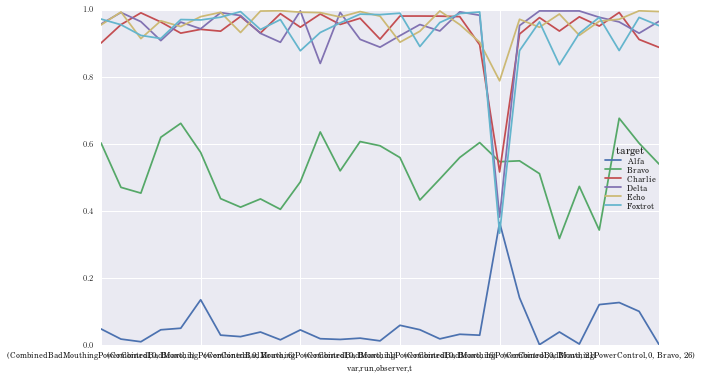

In [52]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

wtp=weighted_trust_perspectives.xs('CombinedBadMouthingPowerControl', level='var', drop_level=False)\
                            .xs(0, level='run', drop_level=False).xs('Bravo',level='observer', drop_level=False)
wtp.plot()


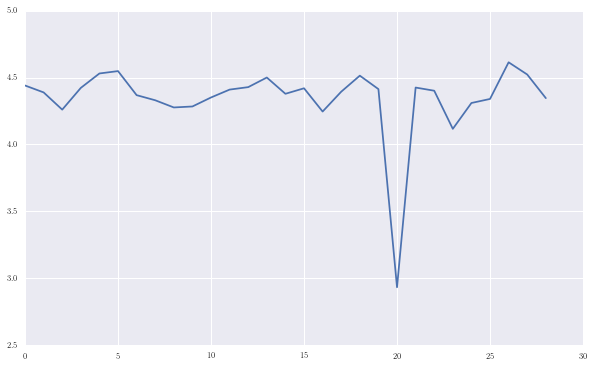

In [53]:
plot(wtp.values.sum(axis=1))

In [54]:

def mean_t_delta(result, target_col=0):
    
    target = result.values[:,target_col]
    cohort = np.delete(result.values, target_col, axis=1)
    #This is geometrically equivalant to doing a time-series mean (i.e. (np.mean(cohort, axis=1)-target).mean())
    return np.subtract(np.mean(cohort),target).mean()

In [55]:
wtp.groupby(level=['var','run','observer'])\
.apply(mean_t_delta)

var                              run  observer
CombinedBadMouthingPowerControl  0    Bravo       0.801921
dtype: float64

In [56]:
wtp.values[0], wtp.values[~0]

(array([ 0.048,  0.603,  0.902,  0.959,  0.956,  0.973]),
 array([ 0.001,  0.54 ,  0.889,  0.967,  0.996,  0.954]))

In [57]:

target = wtp.values[:,1]
cohort = np.delete(wtp.values, 1, axis=1)
target, cohort

(array([ 0.603,  0.471,  0.454,  0.62 ,  0.662,  0.575,  0.437,  0.412,
         0.436,  0.405,  0.487,  0.636,  0.52 ,  0.607,  0.595,  0.56 ,
         0.433,  0.496,  0.56 ,  0.604,  0.547,  0.55 ,  0.512,  0.318,
         0.474,  0.343,  0.677,  0.603,  0.54 ]),
 array([[  4.779e-02,   9.017e-01,   9.585e-01,   9.558e-01,   9.734e-01],
        [  1.749e-02,   9.567e-01,   9.930e-01,   9.946e-01,   9.564e-01],
        [  9.578e-03,   9.919e-01,   9.656e-01,   9.150e-01,   9.246e-01],
        [  4.529e-02,   9.646e-01,   9.090e-01,   9.681e-01,   9.153e-01],
        [  4.991e-02,   9.313e-01,   9.643e-01,   9.509e-01,   9.719e-01],
        [  1.349e-01,   9.427e-01,   9.443e-01,   9.806e-01,   9.707e-01],
        [  2.928e-02,   9.372e-01,   9.926e-01,   9.935e-01,   9.789e-01],
        [  2.483e-02,   9.811e-01,   9.840e-01,   9.332e-01,   9.956e-01],
        [  3.859e-02,   9.317e-01,   9.307e-01,   9.973e-01,   9.421e-01],
        [  1.538e-02,   9.894e-01,   9.041e-01,   9.981e-01

In [58]:
%timeit (np.mean(cohort, axis=1)-target).mean()

The slowest run took 5.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.8 µs per loop


In [59]:
%timeit np.subtract(np.mean(cohort),target).mean()

The slowest run took 8.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.8 µs per loop


In [60]:
l_outliers = []
for i, tf in weighted_trust_perspectives.groupby(level=['var', 'run', 'observer']):
    tf=tf.drop(i[-1], axis=1) #Drop observer from MDT calc
    l_outliers.append((i, mean_t_delta(tf, target_col=0)))
outlier = pd.Series(dict(l_outliers))
outlier.index.names = ['var', 'run', 'observer']
outlier = outlier.sort_index().dropna(how='all').reset_index()
for k in _w.keys():
    outlier[k] = _w[k]
#outlier.set_index(['var'], inplace=True)


In [61]:
outlier.where(outlier.observer != 'Alfa').dropna(how='all').groupby('var')[0].mean()

var
CombinedBadMouthingPowerControl    0.904326
CombinedSelfishTargetSelection     0.007207
CombinedTrust                     -0.008330
Shadow                             0.060467
SlowCoach                          0.057537
Name: 0, dtype: float64

In [62]:
weighted_trust_perspectives.columns.tolist().index('Alfa')

0

In [63]:
from bounos.Analyses.Weight import generate_mean_t_delta_frame
mdt_frame = generate_mean_t_delta_frame(trust_frame, _w, target='Alfa')

In [64]:
mdt_frame.where(mdt_frame.observer != 'Alfa').dropna(how='all').groupby(level='var')[0].mean()

var
CombinedBadMouthingPowerControl    0.904326
CombinedSelfishTargetSelection     0.007207
CombinedTrust                     -0.008330
Shadow                             0.060467
SlowCoach                          0.057537
Name: 0, dtype: float64

In [65]:
def generate_mean_delta_t(path):
    with pd.get_store(path + '.h5') as store:
        trust_frame = store.trust

    outliers = Weight.perform_weight_factor_target_mean_t_delta_analysis_on_trust_frame(trust_frame, min_emphasis=0,
                                                                                        max_emphasis=2, max_sum=1,
                                                                                        verbose=False, par=True)
    outliers.to_hdf(os.path.join(path, "outliers.h5"),
                "{0}".format("meandelta"))
    return outliers

In [66]:
outliers = generate_mean_delta_t(results_path)

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    7.5s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    7.6s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    7.6s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    7.7s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    7.8s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    8.2s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    8.3s remaining:   -0.8s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:   10.7s remaining:   -1.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   10.7s finished


/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/pandas/io/pytables.py:257: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/pandas/io/pytables.py:257: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)


In [67]:
key_order = ['ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'TXThroughput', 'PLR', 'INDD', 'INHD', 'Speed']

outliers.reset_index()
outliers.set_index(key_order, inplace=True)
outliers.sort_index(inplace= True)
outliers

var  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                    
0      0    0    0            0            0   0    0    1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
...                                                                                         ...   
1      0    0    0            0            0   0    0    0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                            SlowCoach   
                                                         0                            SlowCoach   
                                 

In [68]:
mdt_ws=pd.DataFrame({v: g.groupby(level=key_order)[0].mean() for v,g in outliers.groupby('var')})

In [69]:
mdt_ws.reindex()

CombinedBadMouthingPowerControl  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                    
0      0    0    0            0            0   0    0    1                             0.033160   
                                                    1    0                             0.041237   
                                               1    0    0                            -0.060032   
                                           1   0    0    0                            -0.025640   
                              1            0   0    0    0                            -0.030203   
                 1            0            0   0    0    0                             0.003890   
            1    0            0            0   0    0    0                             0.827664   
       1    0    0            0            0   0    0    0                             0.748675   
1      0    0    0            0            0   0    0    0                            -0.033267   

                                                                CombinedSelfishTargetSelection  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                   
0      0    0    0            0            0   0    0    1                            0.013530   
                                                    1    0                            0.009769   
                                               1    0    0                           -0.076060   
                                           1   0    0    0                           -0.028476   
                              1            0   0    0    0                            0.020014   
                 1            0            0   0    0    0                            0.018777   
            1    0            0            0   0    0    0                            0.000000   
       1    0    0            0            0   0    0    0                            0.042661   
1      0    0    0            0            0   0    0    0                           -0.017847   

                                                                CombinedTrust  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                  
0      0    0    0            0            0   0    0    1           0.001317   
                                                    1    0          -0.010636   
                                               1    0    0          -0.038877   
                                           1   0    0    0           0.007738   
                              1            0   0    0    0          -0.014454   
                 1            0            0   0    0    0           0.016491   
            1    0            0            0   0    0    0           0.000000   
       1    0    0            0            0   0    0    0          -0.024670   
1      0    0    0            0            0   0    0    0          -0.008045   

                                                                  Shadow  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed             
0      0    0    0            0            0   0    0    1     -0.165147   
                                                    1    0     -0.123659   
                                               1    0    0     -0.346245   
                                           1   0    0    0      0.007258   
                              1            0   0    0    0     -0.004525   
                 1            0            0   0    0    0      0.019525   
            1    0            0            0   0    0    0      0.000000   
       1    0    0            0            0   0    0    0      0.328315   
1      0    0    0            0            0   0    0    0     -0.020351   

                                                                SlowCoach  
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed             
0      0    0 

In [70]:
mdt_ws_std=pd.DataFrame({v: g.groupby(level=key_order)[0].var() for v,g in outliers.groupby('var')})
mdt_ws_std.reindex()

CombinedBadMouthingPowerControl  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                    
0      0    0    0            0            0   0    0    1                             0.003401   
                                                    1    0                             0.002886   
                                               1    0    0                             0.007981   
                                           1   0    0    0                             0.010162   
                              1            0   0    0    0                             0.009940   
                 1            0            0   0    0    0                             0.009403   
            1    0            0            0   0    0    0                             0.143054   
       1    0    0            0            0   0    0    0                             0.121012   
1      0    0    0            0            0   0    0    0                             0.016796   

                                                                CombinedSelfishTargetSelection  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                   
0      0    0    0            0            0   0    0    1                            0.023421   
                                                    1    0                            0.013272   
                                               1    0    0                            0.018855   
                                           1   0    0    0                            0.007965   
                              1            0   0    0    0                            0.023906   
                 1            0            0   0    0    0                            0.019208   
            1    0            0            0   0    0    0                            0.000000   
       1    0    0            0            0   0    0    0                            0.016156   
1      0    0    0            0            0   0    0    0                            0.009247   

                                                                CombinedTrust  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                  
0      0    0    0            0            0   0    0    1           0.006636   
                                                    1    0           0.006470   
                                               1    0    0           0.013418   
                                           1   0    0    0           0.007840   
                              1            0   0    0    0           0.007534   
                 1            0            0   0    0    0           0.010025   
            1    0            0            0   0    0    0           0.000000   
       1    0    0            0            0   0    0    0           0.007152   
1      0    0    0            0            0   0    0    0           0.008350   

                                                                  Shadow  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed             
0      0    0    0            0            0   0    0    1      0.012916   
                                                    1    0      0.012596   
                                               1    0    0      0.042286   
                                           1   0    0    0      0.007746   
                              1            0   0    0    0      0.005536   
                 1            0            0   0    0    0      0.005547   
            1    0            0            0   0    0    0      0.000000   
       1    0    0            0            0   0    0    0      0.044299   
1      0    0    0            0            0   0    0    0      0.011035   

                                                                SlowCoach  
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed             
0      0    0 

In [71]:
rows = list(mdt_ws.index.names[::-1])
mtd_ms = mdt_ws.reset_index().T

mtd_ms.columns = rows
mtd_ms = mtd_ms[rows[::-1]].drop(rows).T

In [72]:
mtd_ms.apply(np.argmax)

CombinedBadMouthingPowerControl            ATXP
CombinedSelfishTargetSelection             ARXP
CombinedTrust                      RXThroughput
Shadow                                     ARXP
SlowCoach                                  ARXP
dtype: object

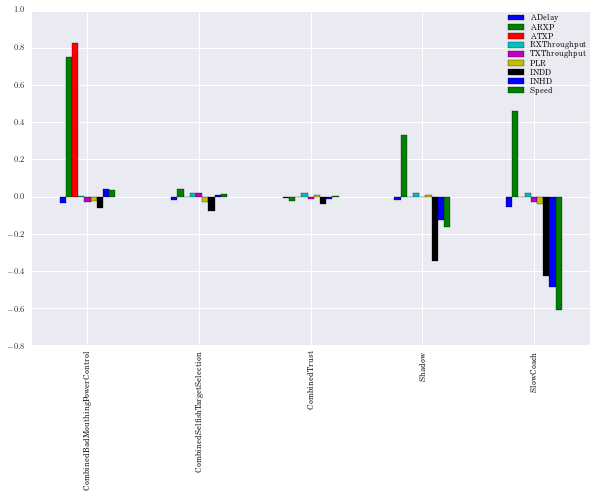

In [76]:
mtd_ms.T.plot(kind='bar')